# <font color='green'>NEW: Trying PCA</font>

In [18]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [19]:
data = pd.read_csv('mydata.csv')

In [20]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36
0,46,40,119,139,42,30,135,157,42,30,...,115,113,50,46,111,116,44,31,131,142
1,47,37,119,133,44,34,124,143,44,34,...,100,85,50,39,118,132,43,29,133,143
2,80,95,100,74,64,64,104,96,46,36,...,100,81,82,91,92,78,78,83,96,74
3,56,51,72,60,59,54,72,60,59,51,...,71,50,57,55,74,61,57,55,78,65
4,44,34,129,140,44,34,124,136,44,34,...,133,139,43,31,128,135,43,29,128,132


In [21]:
X = data.values

In [22]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

/Users/ssicard/Library/Python/3.4/lib/python/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


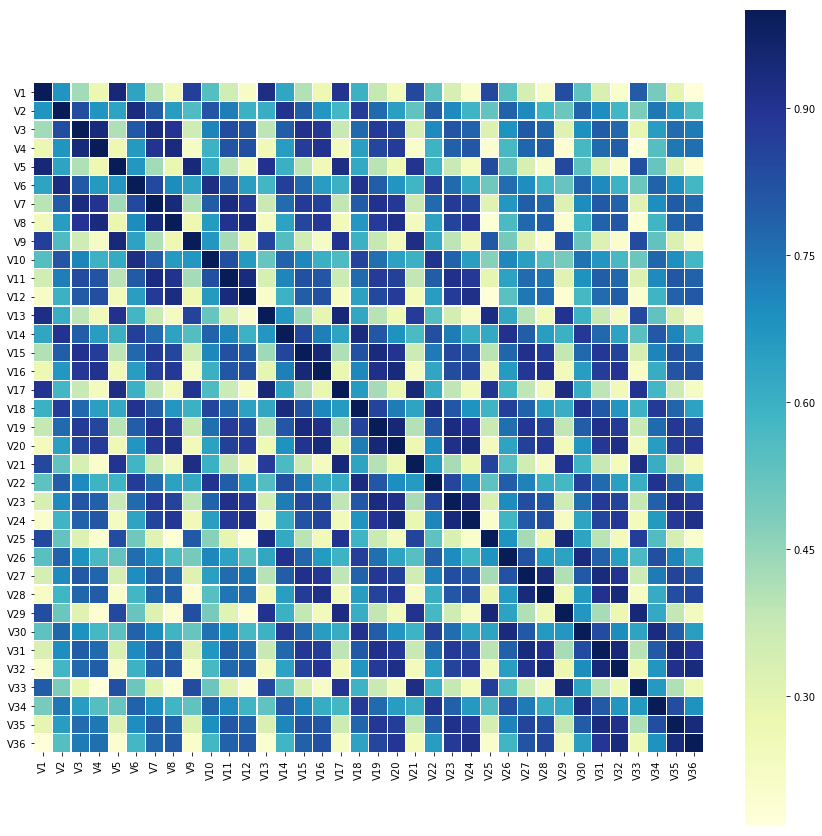

In [23]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax = 1.0, square=True, cmap="YlGnBu")

In [24]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [25]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

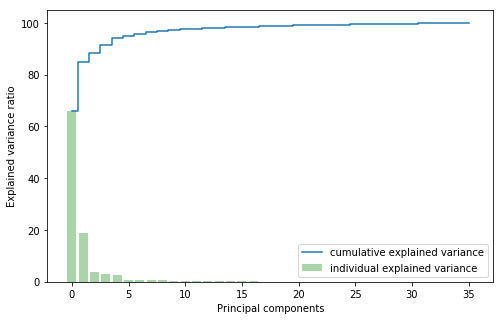

In [26]:
# Plot out explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(36), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(36), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [28]:
# Lets apply PCA now

In [31]:
pca = PCA(n_components=5)
x_5d = pca.fit_transform(X_std)

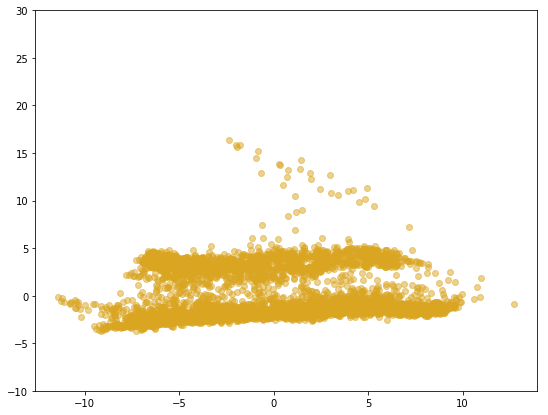

In [32]:
plt.figure(figsize = (9,7))
plt.scatter(x_5d[:,0],x_5d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

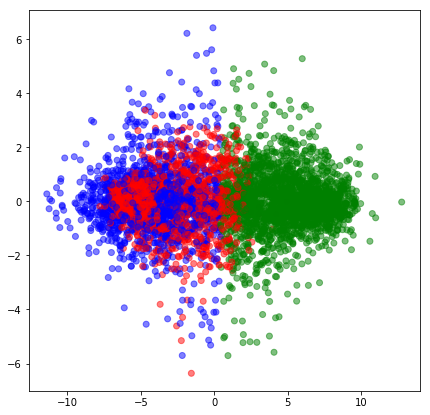

In [38]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_5d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_5d[:,0],x_5d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [39]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_5d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

LinAlgError: singular matrix

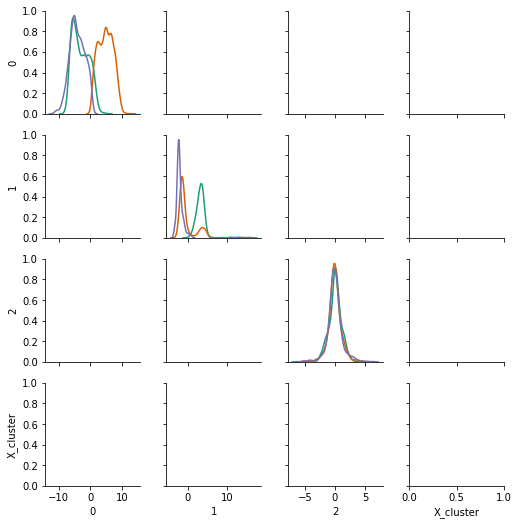

In [40]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)